In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Script to reproduce the glacier mass-balance distribution plot (Fig. 1 of Voordendag, Prinz, Schuster, Kaser, 2023)

@author: Lilian Schuster
"""

# Glacier MB distribution plot inspired by Matthias Huss 
# overall idea: plot specific MB distributions and show that this year (2022) is an extreme melt year. Every vertical line represents the observation of one year
# the original idea is from Matthias Huss, I just replotted it for other glaciers and added some new ideas inside
# original post from Matthias Huss: https://twitter.com/matthias_huss/status/1575539821493293058
# other variants of this Fig. can be found here: https://github.com/lilianschuster/glacier_climate_plots/tree/main/extreme_glacier_mb_distribution_plots

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import cm
import scipy
from scipy.stats import norm
import seaborn as sns

plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

# load the data
### here we have the data for Hintereisferner and Kesselwandferner, 
### but the code should similarly work for other glaciers (with some tiny manual adjustments)
spec_mb = pd.read_csv('spec_mb_hef_kwf_oct2022.csv', sep=';')
spec_mb.index = spec_mb['calender year']
# check if there are any missing columns and if yes drop them
spec_mb = spec_mb.dropna()

base_col = sns.color_palette([sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[2], sns.color_palette('colorblind')[3]])

col_sp_yr = {2020: base_col[0],
            2021: base_col[1],
            2022: base_col[2]}

version = 'tc'
glacier = 'Hintereisferner'
for save in ['save_pdf_svg']: # 'save_png',
    # the arrow - line connections to display the ranges somehow work differently if saved as png or as pdf svg, therefore I need different numbers to get "similar" outcomes
    if save == 'save_png':
        armB = 150
    elif save == 'save_pdf_svg':
        armB = 45
    arrowprops = {"arrowstyle":"-", "color":"gray", "connectionstyle":f"arc,angleA=0,angleB=90,armA=0,armB={armB},rad=30", "lw":2}

    y_span_text_m = 0.18
    spec_mb_values = spec_mb['HEF mass balance (kg/m�)']/1000 # use 10**3 kg m-2 

    # get maximum specific mb and use them as limits for the plots and for the colormap scales 
    # we center the mass balance at 0, hence we just get the maximum absolute value 
    xlims_abs = np.max([np.absolute(spec_mb_values.max()),
            np.absolute(spec_mb_values.min())])*1.1

    fig,_ = plt.subplots(1,1,figsize=(10,6))
    fig.set_dpi(300)

    # plot each year as vertical line 
    for j, yr in enumerate(spec_mb.index):
        if yr in [2020,2021,2022]:
            color = col_sp_yr[yr]
            lw=5
            plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw, label =f'{yr-1}/{str(yr)[2:]}')

        else:
            color = 'black'
            lw = 0.5
            plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw)
    plt.legend(fontsize=20)

    plt.xlim([-xlims_abs, xlims_abs])

    # fit and plot the generalized extreme value distribution (fitted from the observations)
    params = scipy.stats.genextreme.fit(spec_mb_values)
    xmin, xmax = -xlims_abs,xlims_abs
    x = np.linspace(xmin, xmax, 100)
    y = scipy.stats.genextreme.pdf(x, *params)
    # get mean and std of the observed specific mb values by using the generalized extreme value distribution ... 
    mean = scipy.stats.genextreme.mean(*params)
    std = scipy.stats.genextreme.std(*params)
    
    plt.plot(x, y, lw=4, color='black')
         

    plt.xlabel(r'mass balance (10$^{3}$ kg m$^{-2}$)', fontsize=24)
    ax = plt.gca()
    ax.set_xticks(np.arange(-int(xlims_abs)-1, int(xlims_abs)+1.01,0.1), minor=True)
    plt.xticks(ticks=np.arange(-int(xlims_abs), int(xlims_abs)+0.01,1), fontsize=22) 
    ax.tick_params(axis='x', which='major', labelsize=22, width=2) 

    plt.xlim([-xlims_abs, xlims_abs])

    plt.text(0.77, 0.5,
             f'n={len(spec_mb_values)} years:\n1952-2022', 
             transform=plt.gca().transAxes, fontsize=20)

    # create secondary axis and plot the quantiles 
    ax2 = ax.secondary_xaxis(location='top')

    ax2.set_xticks([mean-3*std,mean-2*std,mean-1*std,mean,mean+1*std,mean+2*std,mean+3*std])
    ax2.set_xticklabels(labels= [r'-3$\sigma$',r'-2$\sigma$',r'-1$\sigma$',
                                 r'mean',r'+1$\sigma$', r'+2$\sigma$', r'+3$\sigma$']) 
    ax2.set_zorder(2)

    # remove yticks
    plt.yticks(ticks=[])
    #remove yline axis
    ax.spines['left'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    # make sure that 0 "probability" is directly on the x-axis
    plt.ylim([0,y.max()*1.01])


    #if save=='save_png':
    plt.tight_layout()
    # set the parameters for both axis: label size in font points, the line tick line width and length in pixels
    ax2.tick_params(axis='x', which='major', labelsize=20, width=2.5, length=10)

    plt.savefig(f'fig_1_hef_mb_distributions_tc_gev.svg', bbox_inches='tight')
    plt.savefig(f'fig_1_hef_mb_distributions_tc_gev.pdf', bbox_inches='tight')

    plt.close()

In [2]:
periods = [1953,1963,1973,1983]
colors = sns.color_palette(palette='magma', n_colors = len(periods))
periods.append('all')
periods

[1953, 1963, 1973, 1983, 'all']

2000, 11.044017708993415, 2021, 4.347192375605322, 2022, 9931963012581.1
2000, 6.37321434338309, 2021, 2.9943460456860063, 2022, 1241529947303506.0
2000, 3.4426689763001157, 2021, 2.2037171767583597, 2022, 29557.92560212418
2000, 2.2810712848176826, 2021, 1.5199070212194792, 2022, 9404.406355633284
2000, 2.8795689086408336, 2021, 2.0145534159984755, 2022, 2245.822599676864


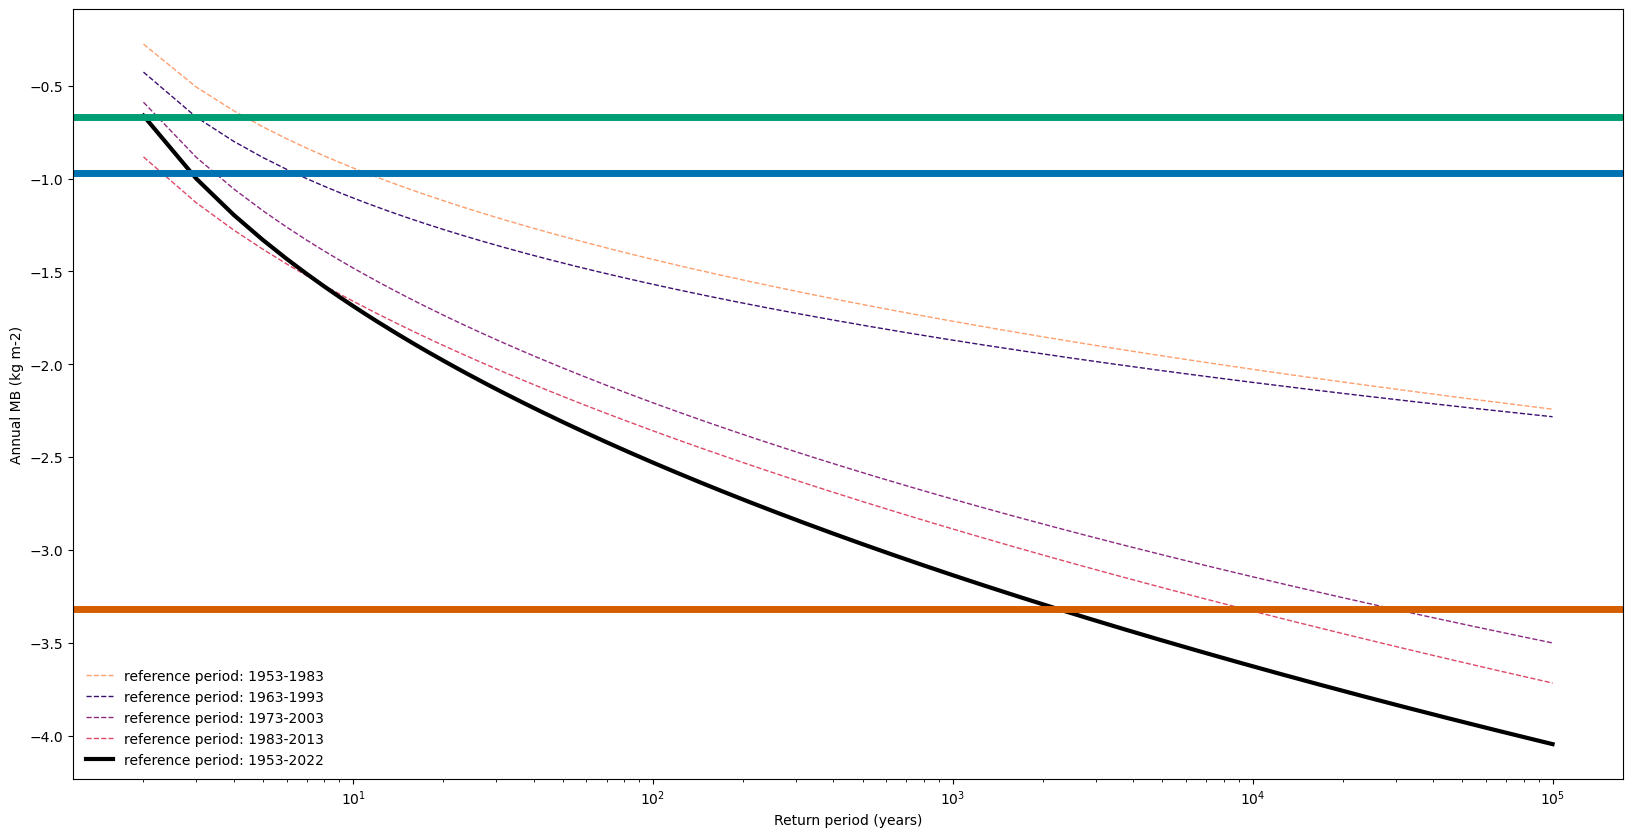

In [71]:
# https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python/blob/master/extremeBasic.ipynb
# https://xiaoganghe.github.io/python-climate-visuals/chapters/data-analytics/scipy-basic.html
plt.figure(figsize=(20,10))
for j,period in enumerate(periods):
    if period == 'all':
        period = np.arange(spec_mb_values.index[0], spec_mb_values.index[-1]+1,1)
    else:
        period = np.arange(period, period+31,1)
    params = scipy.stats.genextreme.fit(spec_mb_values.loc[period])
    gev_fit = scipy.stats.genextreme(*params)  #frozen distribution

    #params = scipy.stats.genextreme.fit(spec_mb_values)
    #gev_fit_ = scipy.stats.genextreme(*params)  #frozen distribution


    # return periods from 2 years to 1000 years
    T = np.arange(2, 1e5)

    # 
    LFTmle = gev_fit.ppf(1.0 / T)
    LFTmle = pd.DataFrame(LFTmle, index=T, columns=["Annual MB"])
    LFTmle.index.name = "Return period"
    #print(LFTmle.loc[[2, 5, 10, 100, 1000, 5000]])

    if j==len(periods)-1:
        ls = '-'
        lw = 3
        color = 'black'
    else:
        ls = '--'
        lw = 1
        color = colors[j-1]
    # Plot low-flow vs return periods
    plt.plot(LFTmle, ls, lw=lw, label=f'reference period: {period[0]}-{period[-1]}', color = color)
    plt.xscale('log')
    plt.ylabel('Annual MB (kg m-2)')
    plt.xlabel('Return period (years)')
    
    print(f'2000, {1/gev_fit.cdf(spec_mb_values.loc[2020])}, 2021, {1/gev_fit.cdf(spec_mb_values.loc[2021])}, 2022, {1/gev_fit.cdf(spec_mb_values.loc[2022])}')
for yr in [2020,2021,2022]:
    color = col_sp_yr[yr]
    plt.axhline(spec_mb_values.loc[yr], color=color, lw=5)

#plt.title(f'{period[0]}-{period[1]}')
plt.legend(loc='best', frameon=False)

In [82]:
colors = sns.color_palette(palette='flare_r', n_colors = len(periods))
colors

[(0.31494974, 0.14391333, 0.39127626),
 (0.33604378, 0.15006017, 0.39835754),
 (0.35748213, 0.15559861, 0.40552633),
 (0.37928736, 0.16052483, 0.41270599),
 (0.401357, 0.16501079, 0.41963528),
 (0.42355299, 0.16934709, 0.42581586),
 (0.44584668, 0.17360625, 0.43114133),
 (0.46818879, 0.17788392, 0.43552047),
 (0.49052472, 0.18228477, 0.43887255),
 (0.51278481, 0.18693492, 0.44112605),
 (0.5385549, 0.19285696, 0.44229959),
 (0.56041794, 0.19845221, 0.44207535),
 (0.5822395, 0.20425693, 0.44098758),
 (0.60407977, 0.21017746, 0.43913439),
 (0.62597451, 0.21616235, 0.43656529),
 (0.64795375, 0.22217149, 0.43330852),
 (0.67004287, 0.22817117, 0.42938576),
 (0.69226314, 0.23413578, 0.42480327),
 (0.71463236, 0.24004289, 0.41956983),
 (0.73695678, 0.24620072, 0.41357737),
 (0.76214598, 0.25492998, 0.40539471),
 (0.7826624, 0.26420493, 0.39754146),
 (0.80185613, 0.2755178, 0.38925253),
 (0.81942908, 0.28911553, 0.38102921),
 (0.83520234, 0.30499724, 0.37346726),
 (0.84916723, 0.32289973, 0.36711424),
 (0.86145909, 0.3424046, 0.36234402),
 (0.87199254, 0.3633634, 0.35974223),
 (0.880851, 0.38546632, 0.35970244),
 (0.888292, 0.40830288, 0.36223756),
 (0.89458871, 0.4315354, 0.36715654),
 (0.90077904, 0.45884905, 0.37556121),
 (0.90529624, 0.48228017, 0.38472641),
 (0.90921368, 0.5056543, 0.39544411),
 (0.91262605, 0.52893336, 0.40749715),
 (0.9155979, 0.55210684, 0.42070204),
 (0.91825103, 0.57516584, 0.43441436),
 (0.92077582, 0.59804722, 0.44818634),
 (0.9231622, 0.6207962, 0.46202524),
 (0.92539502, 0.64345456, 0.47594352),
 (0.9274375, 0.66607098, 0.48996097)]

In [84]:
len(periods)

41

In [20]:
scipy.stats.genextreme?

Signature:       scipy.stats.genextreme(*args, **kwds)
Type:            genextreme_gen
String form:     <scipy.stats._continuous_distns.genextreme_gen object at 0x7fe416005100>
File:            ~/micromamba/envs/oggm_pymc/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A generalized extreme value continuous random variable.

As an instance of the `rv_continuous` class, `genextreme` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(c, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, c, loc=0, scale=1)
    Probability density function.
logpdf(x, c, loc=0, scale=1)
    Log of the probability density function.
cdf(x, c, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, c, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, c, loc=0, scale=1)
    Survival function  (also defi

reference period: 1953-1983: MB from yr 2020 with return period of every 11 years; from yr 2021 with return period of every 4 years; from yr 2022 with return period of every 9931963012581 years
reference period: 1954-1984: MB from yr 2020 with return period of every 11 years; from yr 2021 with return period of every 5 years; from yr 2022 with return period of every 405207308534 years
reference period: 1955-1985: MB from yr 2020 with return period of every 11 years; from yr 2021 with return period of every 4 years; from yr 2022 with return period of every 1009713051162 years
reference period: 1956-1986: MB from yr 2020 with return period of every 10 years; from yr 2021 with return period of every 4 years; from yr 2022 with return period of every 68558643188829 years
reference period: 1957-1987: MB from yr 2020 with return period of every 10 years; from yr 2021 with return period of every 4 years; from yr 2022 with return period of every 729403563134461 years
reference period: 1958-1988:

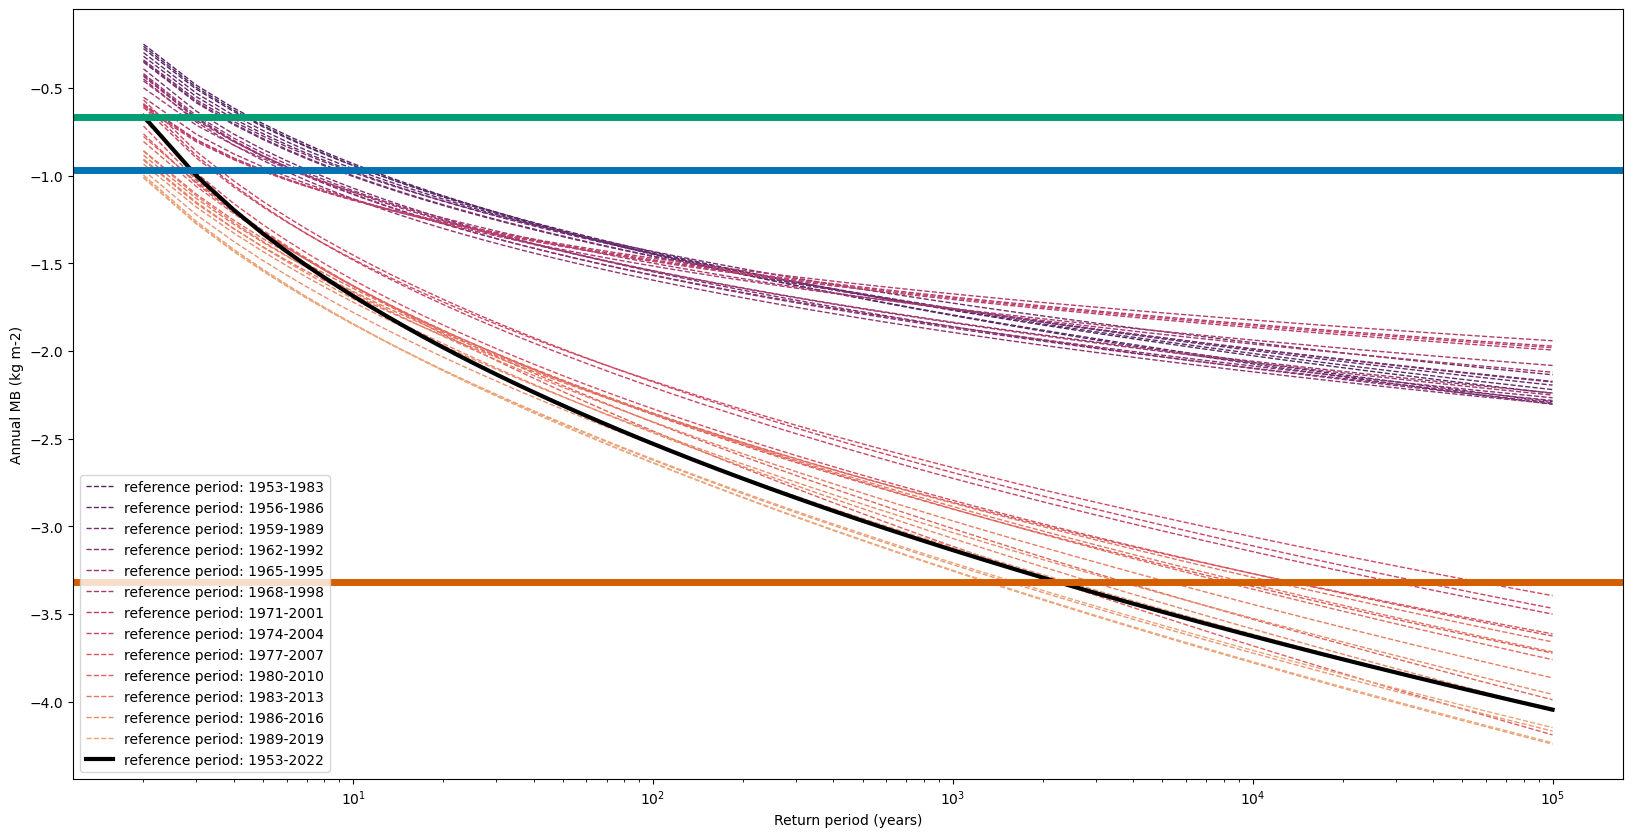

In [101]:
# https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python/blob/master/extremeBasic.ipynb
# https://xiaoganghe.github.io/python-climate-visuals/chapters/data-analytics/scipy-basic.html
periods = list(np.arange(1953,2021-30+1,1)) # don't want to have 2020, 2021, 2022 included
colors = sns.color_palette(palette='flare_r', n_colors = len(periods))
periods.append('all')
plt.figure(figsize=(20,10))
for j,period in enumerate(periods):
    if period == 'all':
        period = np.arange(spec_mb_values.index[0], spec_mb_values.index[-1]+1,1)
    else:
        period = np.arange(period, period+31,1)
    params = scipy.stats.genextreme.fit(spec_mb_values.loc[period])
    gev_fit = scipy.stats.genextreme(*params)  #frozen distribution

    #params = scipy.stats.genextreme.fit(spec_mb_values)
    #gev_fit_ = scipy.stats.genextreme(*params)  #frozen distribution


    # return periods from 2 years to 1000 years
    T = np.arange(2, 1e5)

    # 
    LFTmle = gev_fit.ppf(1.0 / T)
    LFTmle = pd.DataFrame(LFTmle, index=T, columns=["Annual MB"])
    LFTmle.index.name = "Return period"
    #print(LFTmle.loc[[2, 5, 10, 100, 1000, 5000]])

    if j==len(periods)-1:
        ls = '-'
        lw = 3
        color = 'black'
    else:
        ls = '--'
        lw = 1
        color = colors[j]
    # Plot low-flow vs return periods
    plt.plot(LFTmle, ls, lw=lw, label=f'reference period: {period[0]}-{period[-1]}', color = color)
    plt.xscale('log')
    plt.ylabel('Annual MB (kg m-2)')
    plt.xlabel('Return period (years)')
    
    print(f'reference period: {period[0]}-{period[-1]}: '+f'MB from yr 2020 with return period of every {1/gev_fit.cdf(spec_mb_values.loc[2020]):.0f} years; from yr 2021 with return period of every {1/gev_fit.cdf(spec_mb_values.loc[2021]):.0f} years; from yr 2022 with return period of every {1/gev_fit.cdf(spec_mb_values.loc[2022]):.0f} years')
    
legend, handles = plt.gca().get_legend_handles_labels()
plt.legend(legend[::3], handles[::3], loc = 'lower left')
for yr in [2020,2021,2022]:
    color = col_sp_yr[yr]
    plt.axhline(spec_mb_values.loc[yr], color=color, lw=5)


- does this make sense????

In [17]:
np.arange(period, period+30,1)

TypeError: can only concatenate str (not "int") to str

In [16]:
period = periods[-1]

reference period: 1953-1982: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1954-1983: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1955-1984: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1956-1985: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1957-1986: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1958-1987: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1959-1988: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1960-1989: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1961-1990: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1962-1991: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1963-1992: MB from yr 2020 with exceedance probability of  0.0000%
reference period: 1964-1993: MB from yr 2020 with exceedance prob

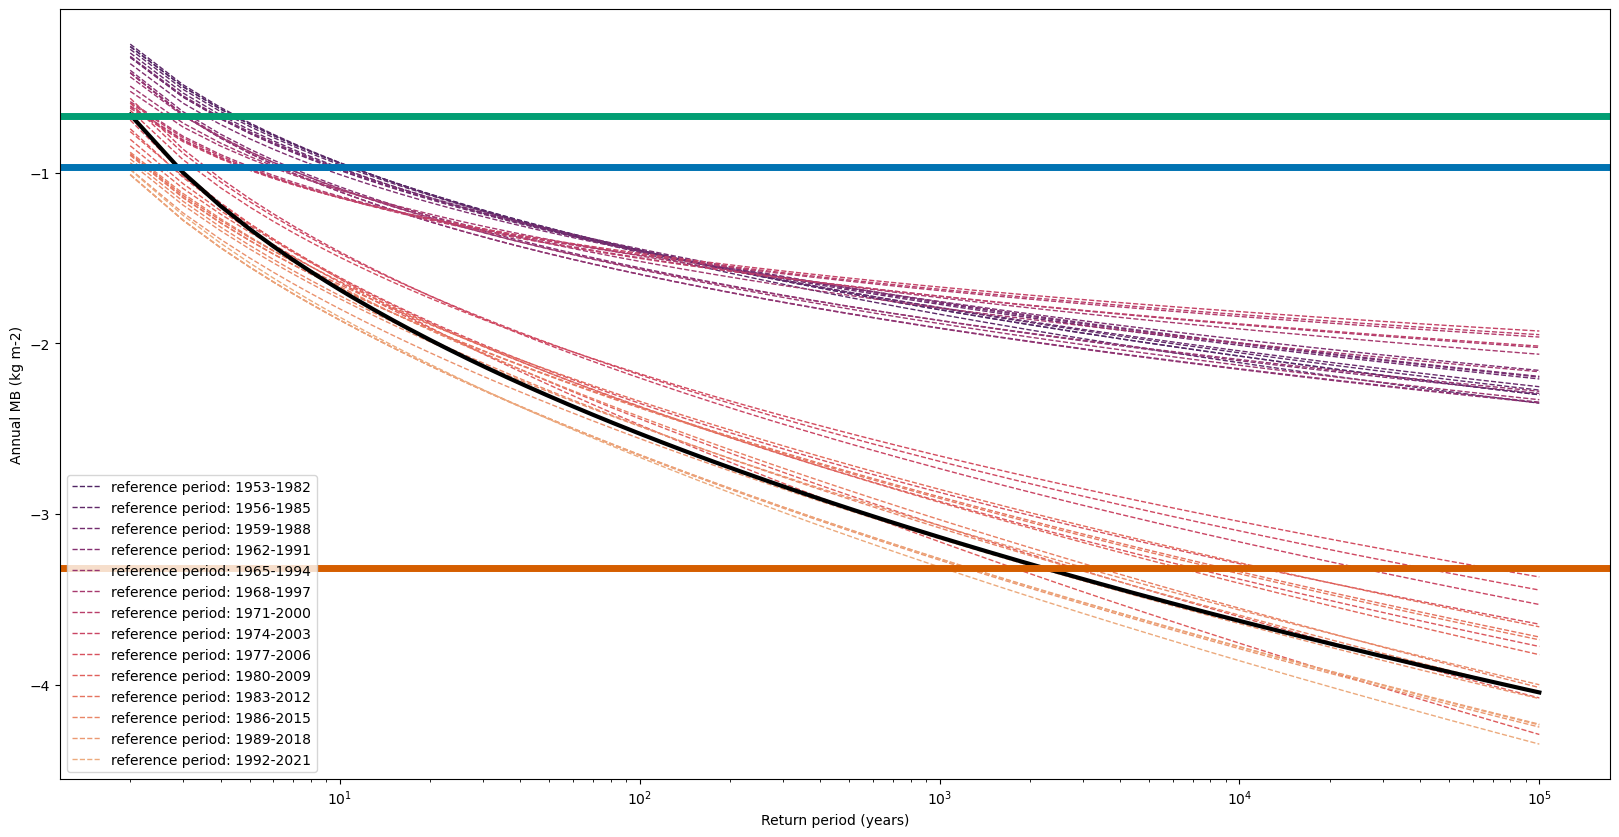

In [19]:
# https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python/blob/master/extremeBasic.ipynb
# https://xiaoganghe.github.io/python-climate-visuals/chapters/data-analytics/scipy-basic.html
periods = list(np.arange(1953,2021-30+2,1)) # don't want to have 2020, 2021, 2022 included
colors = sns.color_palette(palette='flare_r', n_colors = len(periods))
periods.append('all')
plt.figure(figsize=(20,10))
for j,period in enumerate(periods):
    if period == 'all':
        period = np.arange(spec_mb_values.index[0], spec_mb_values.index[-1]+1,1)
    else:
        period = np.arange(period, period+30,1)
    params = scipy.stats.genextreme.fit(spec_mb_values.loc[period])
    gev_fit = scipy.stats.genextreme(*params)  #frozen distribution

    #params = scipy.stats.genextreme.fit(spec_mb_values)
    #gev_fit_ = scipy.stats.genextreme(*params)  #frozen distribution


    # return periods from 2 years to 1000 years
    T = np.arange(2, 1e5)

    # 
    LFTmle = gev_fit.ppf(1.0 / T)
    LFTmle = pd.DataFrame(LFTmle, index=T, columns=["Annual MB"])
    LFTmle.index.name = "Return period"
    #print(LFTmle.loc[[2, 5, 10, 100, 1000, 5000]])

    if j==len(periods)-1:
        ls = '-'
        lw = 3
        color = 'black'
    else:
        ls = '--'
        lw = 1
        color = colors[j]
    # Plot low-flow vs return periods
    plt.plot(LFTmle, ls, lw=lw, label=f'reference period: {period[0]}-{period[-1]}', color = color)
    plt.xscale('log')
    plt.ylabel('Annual MB (kg m-2)')
    plt.xlabel('Return period (years)')
    
    print(f'reference period: {period[0]}-{period[-1]}: '+f'MB from yr 2020 with exceedance probability of  {gev_fit.cdf(spec_mb_values.loc[2022])*100:.4f}%')
    
legend, handles = plt.gca().get_legend_handles_labels()
plt.legend(legend[::3], handles[::3], loc = 'lower left')
for yr in [2020,2021,2022]:
    color = col_sp_yr[yr]
    plt.axhline(spec_mb_values.loc[yr], color=color, lw=5)


## Glacier MB distribution plots inspired by Matthias Huss 
- overall idea: plot specific MB distributions and show that this year (2022) is an extreme melt year. Every vertical line represents the observation of one year
- the original idea is from Matthias Huss, I just replotted it for other glaciers and added some new ideas inside
    - original post from Matthias Huss: https://twitter.com/matthias_huss/status/1575539821493293058



---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import cm
import scipy
from scipy.stats import norm
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

**here we use the data for Hintereisferner and Kesselwandferner:**
- but the code should similarly work for other glaciers (with some tiny manual adjustments)

In [2]:
# load the data
spec_mb = pd.read_csv('spec_mb_hef_kwf_oct2022.csv', sep=';')
spec_mb.index = spec_mb['calender year']
# check if there are any missing columns and if yes drop them
spec_mb = spec_mb.dropna()

In [3]:
spec_mb.loc[spec_mb['HEF mass balance (kg/m�)']>0]

,hydrological year,calender year,HEF mass balance (kg/m�),KWF mass balance (kg/m�)
calender year,,,,
1955,1954/1955,1955,76,246
1965,1964/1965,1965,925,1039
1966,1965/1966,1966,344,594
1967,1966/1967,1967,20,297
1968,1967/1968,1968,338,464
1974,1973/1974,1974,55,573
1975,1974/1975,1975,65,369
1977,1976/1977,1977,760,701
1978,1977/1978,1978,411,422


the last year that had a positive MB for the HEF over the entire time series:

In [4]:
spec_mb.loc[spec_mb['HEF mass balance (kg/m�)']>0].index.max()

1984

amont of years with positive MB in total: (all before 1984 for HEF)

In [5]:
len(spec_mb.loc[spec_mb['HEF mass balance (kg/m�)']>0])

10

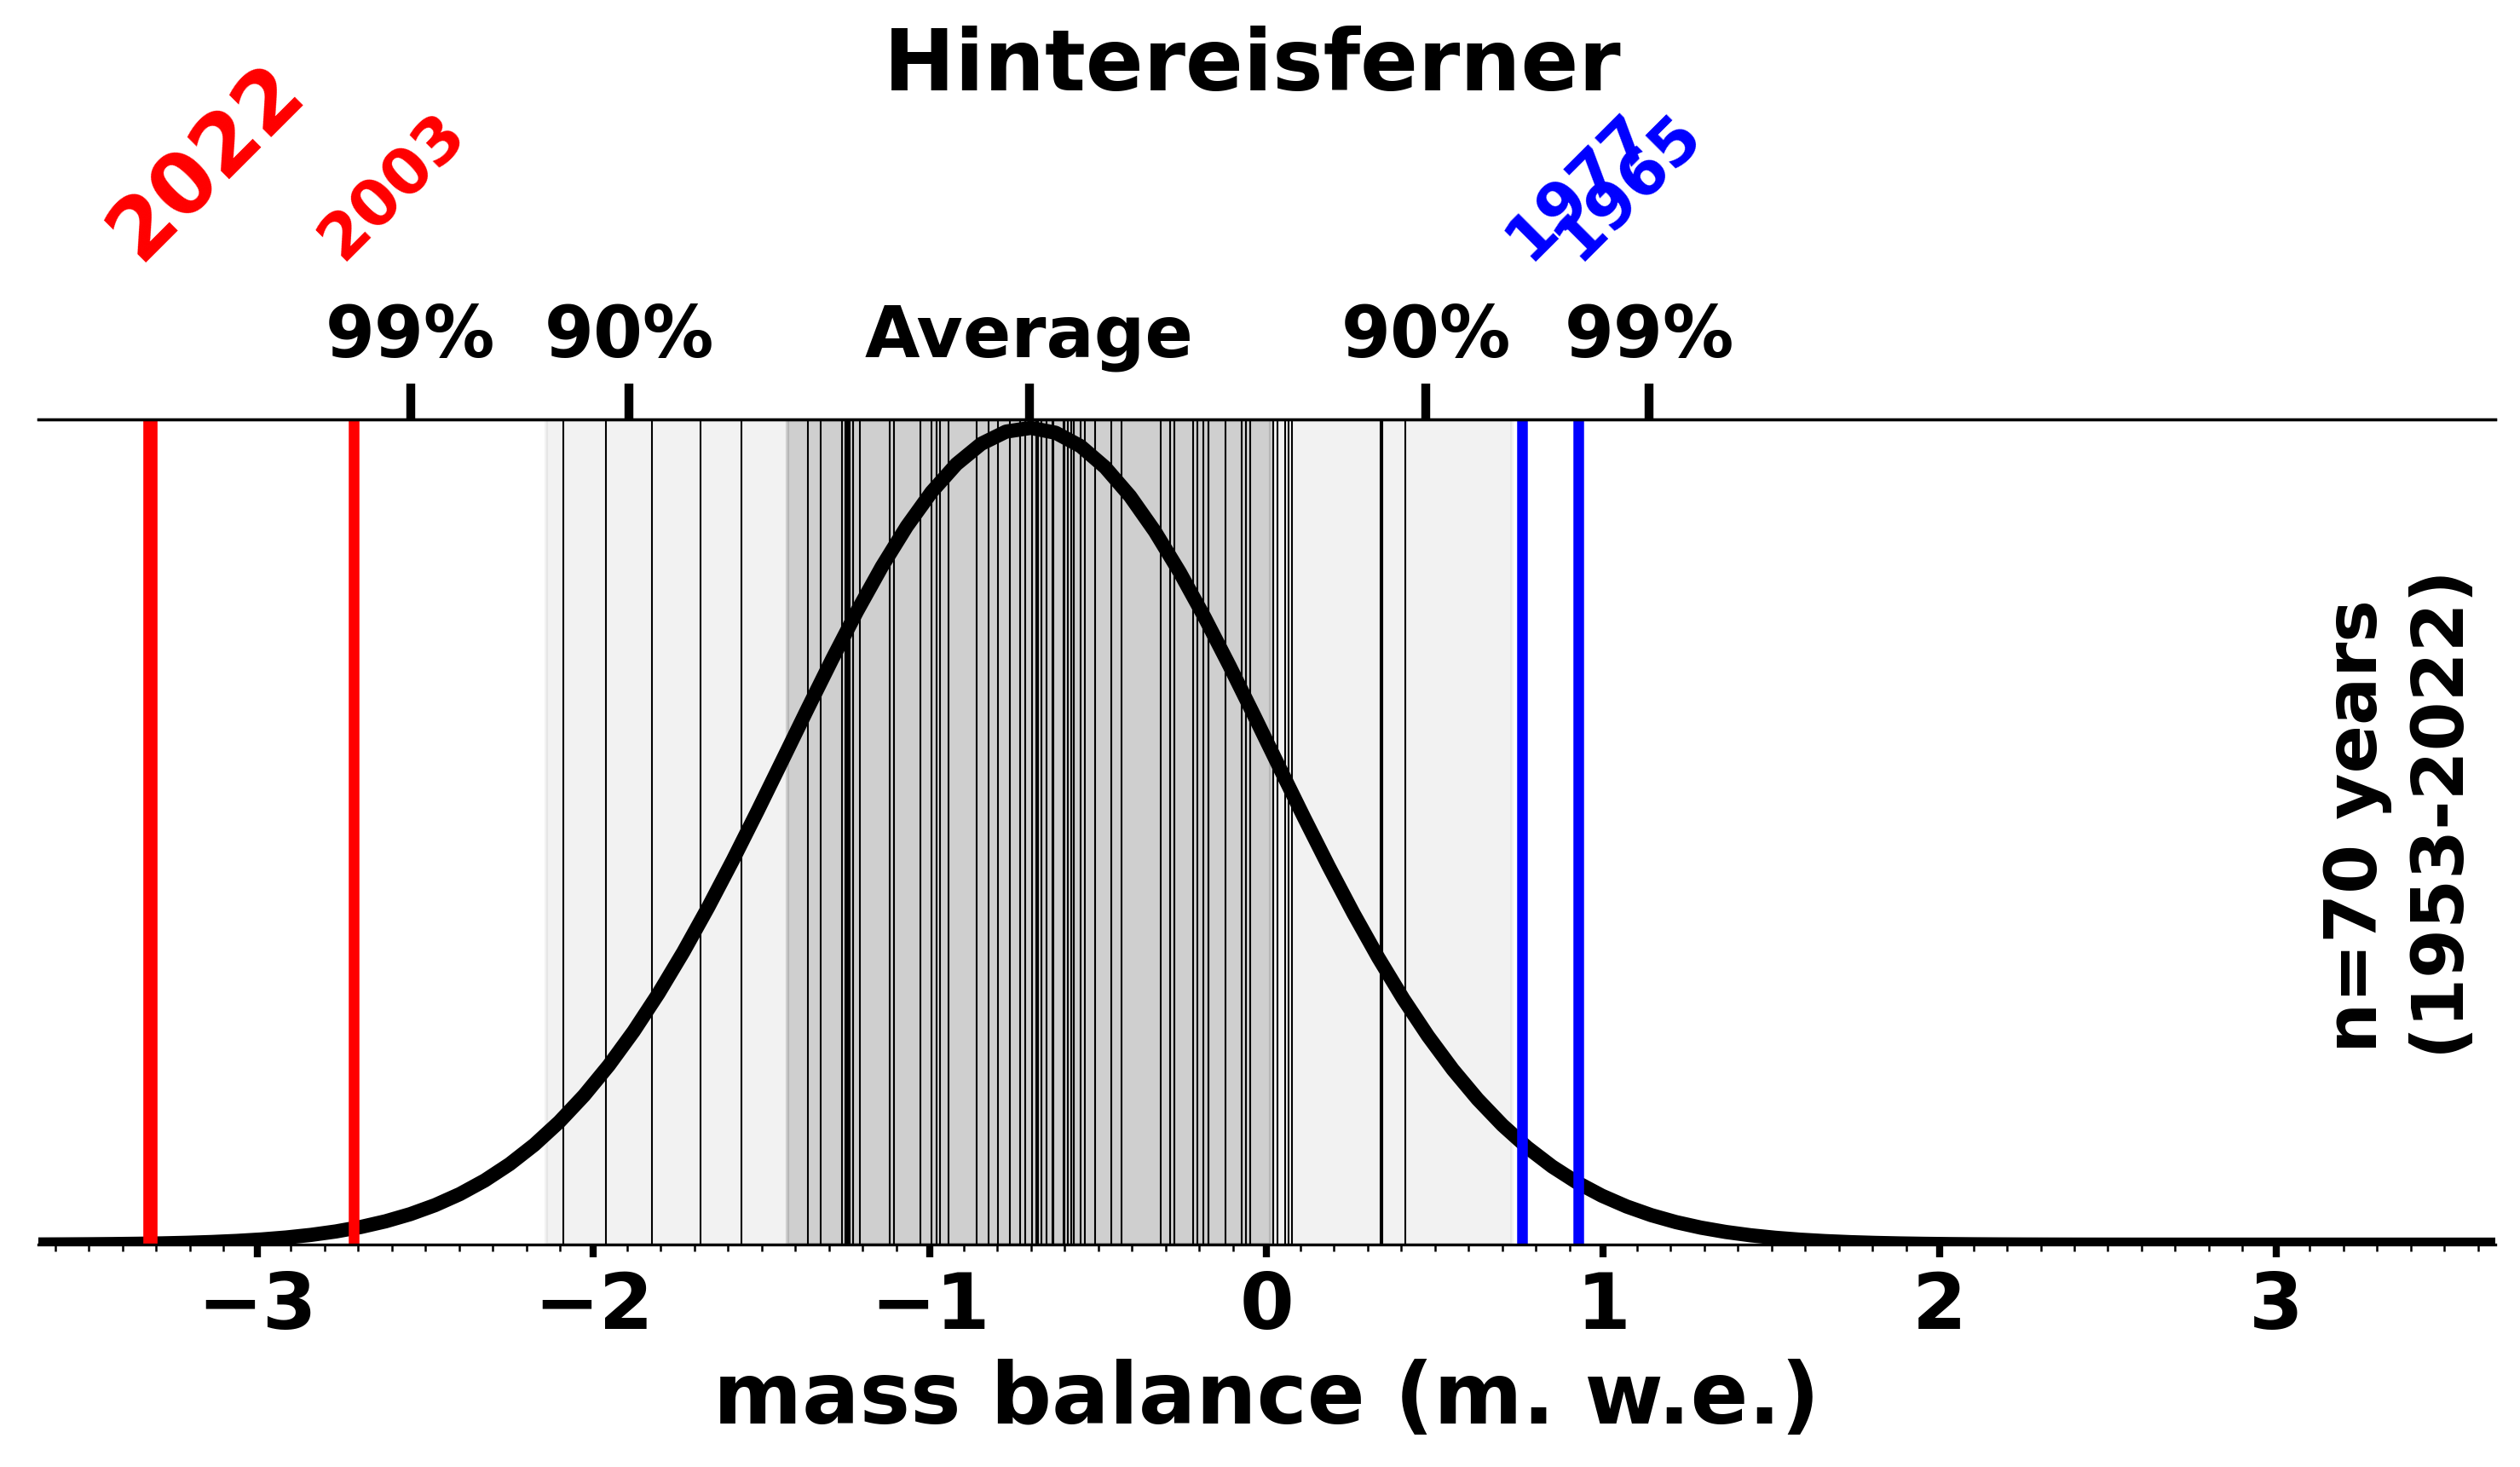

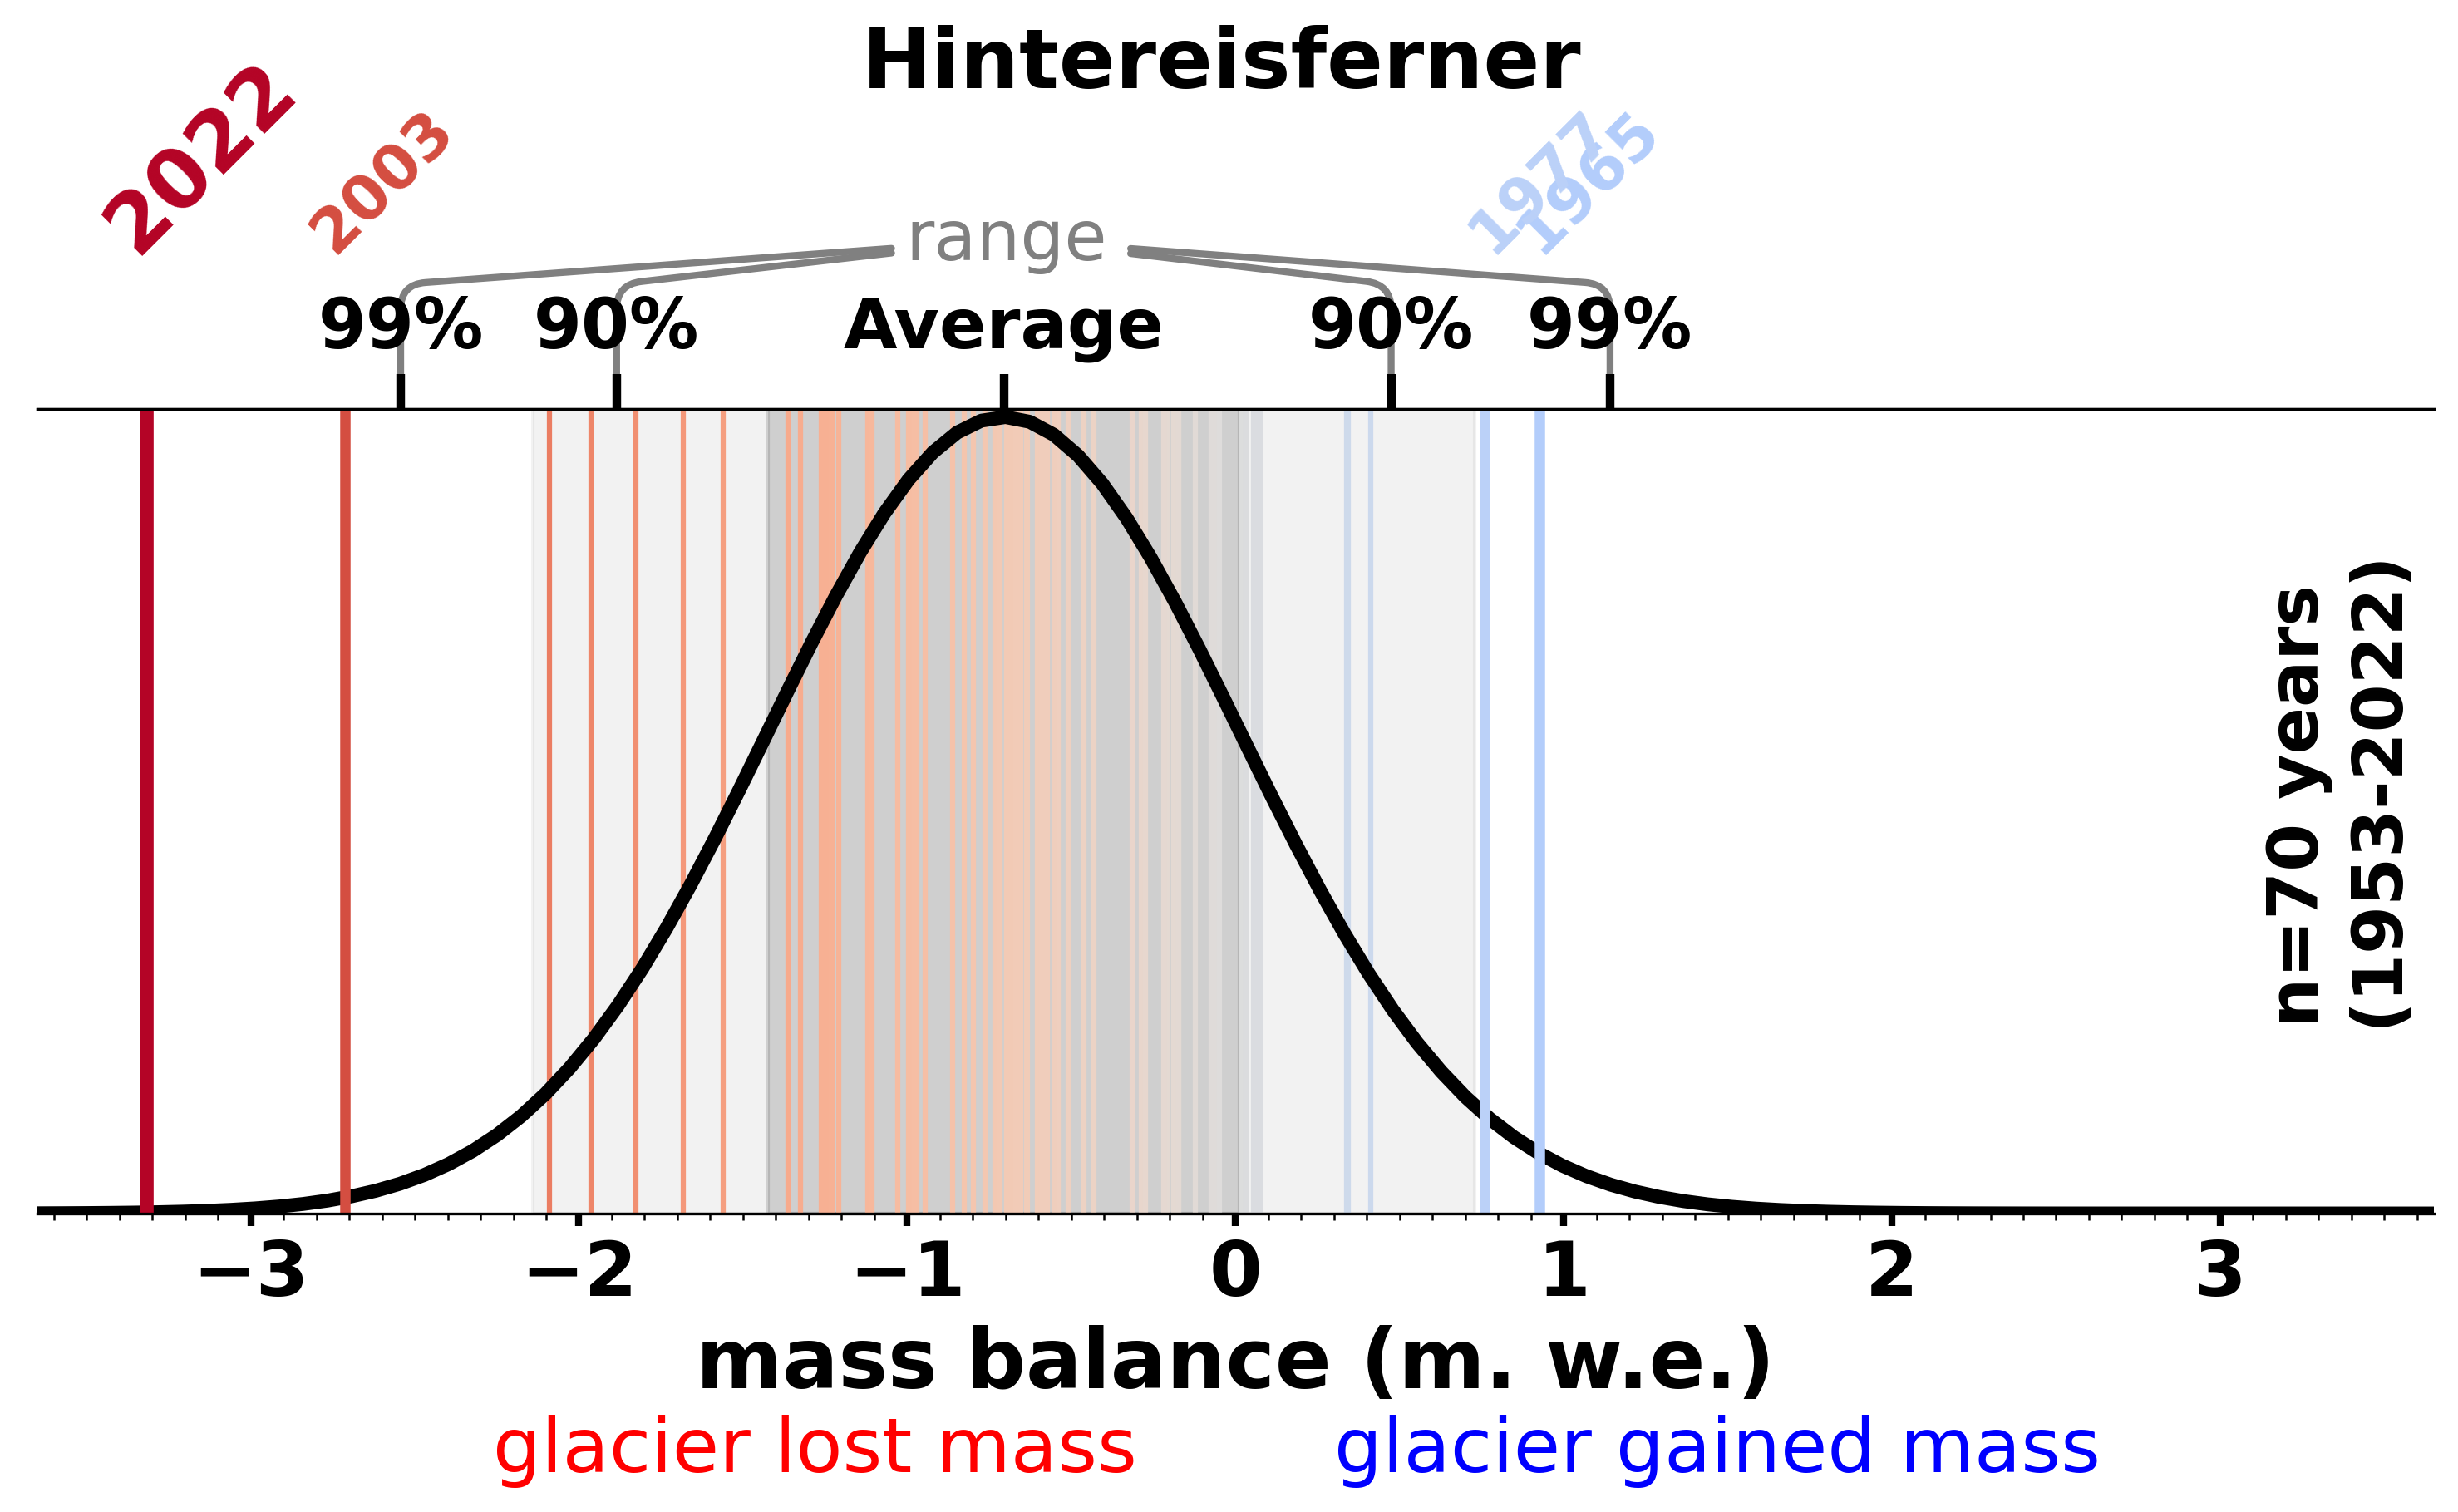

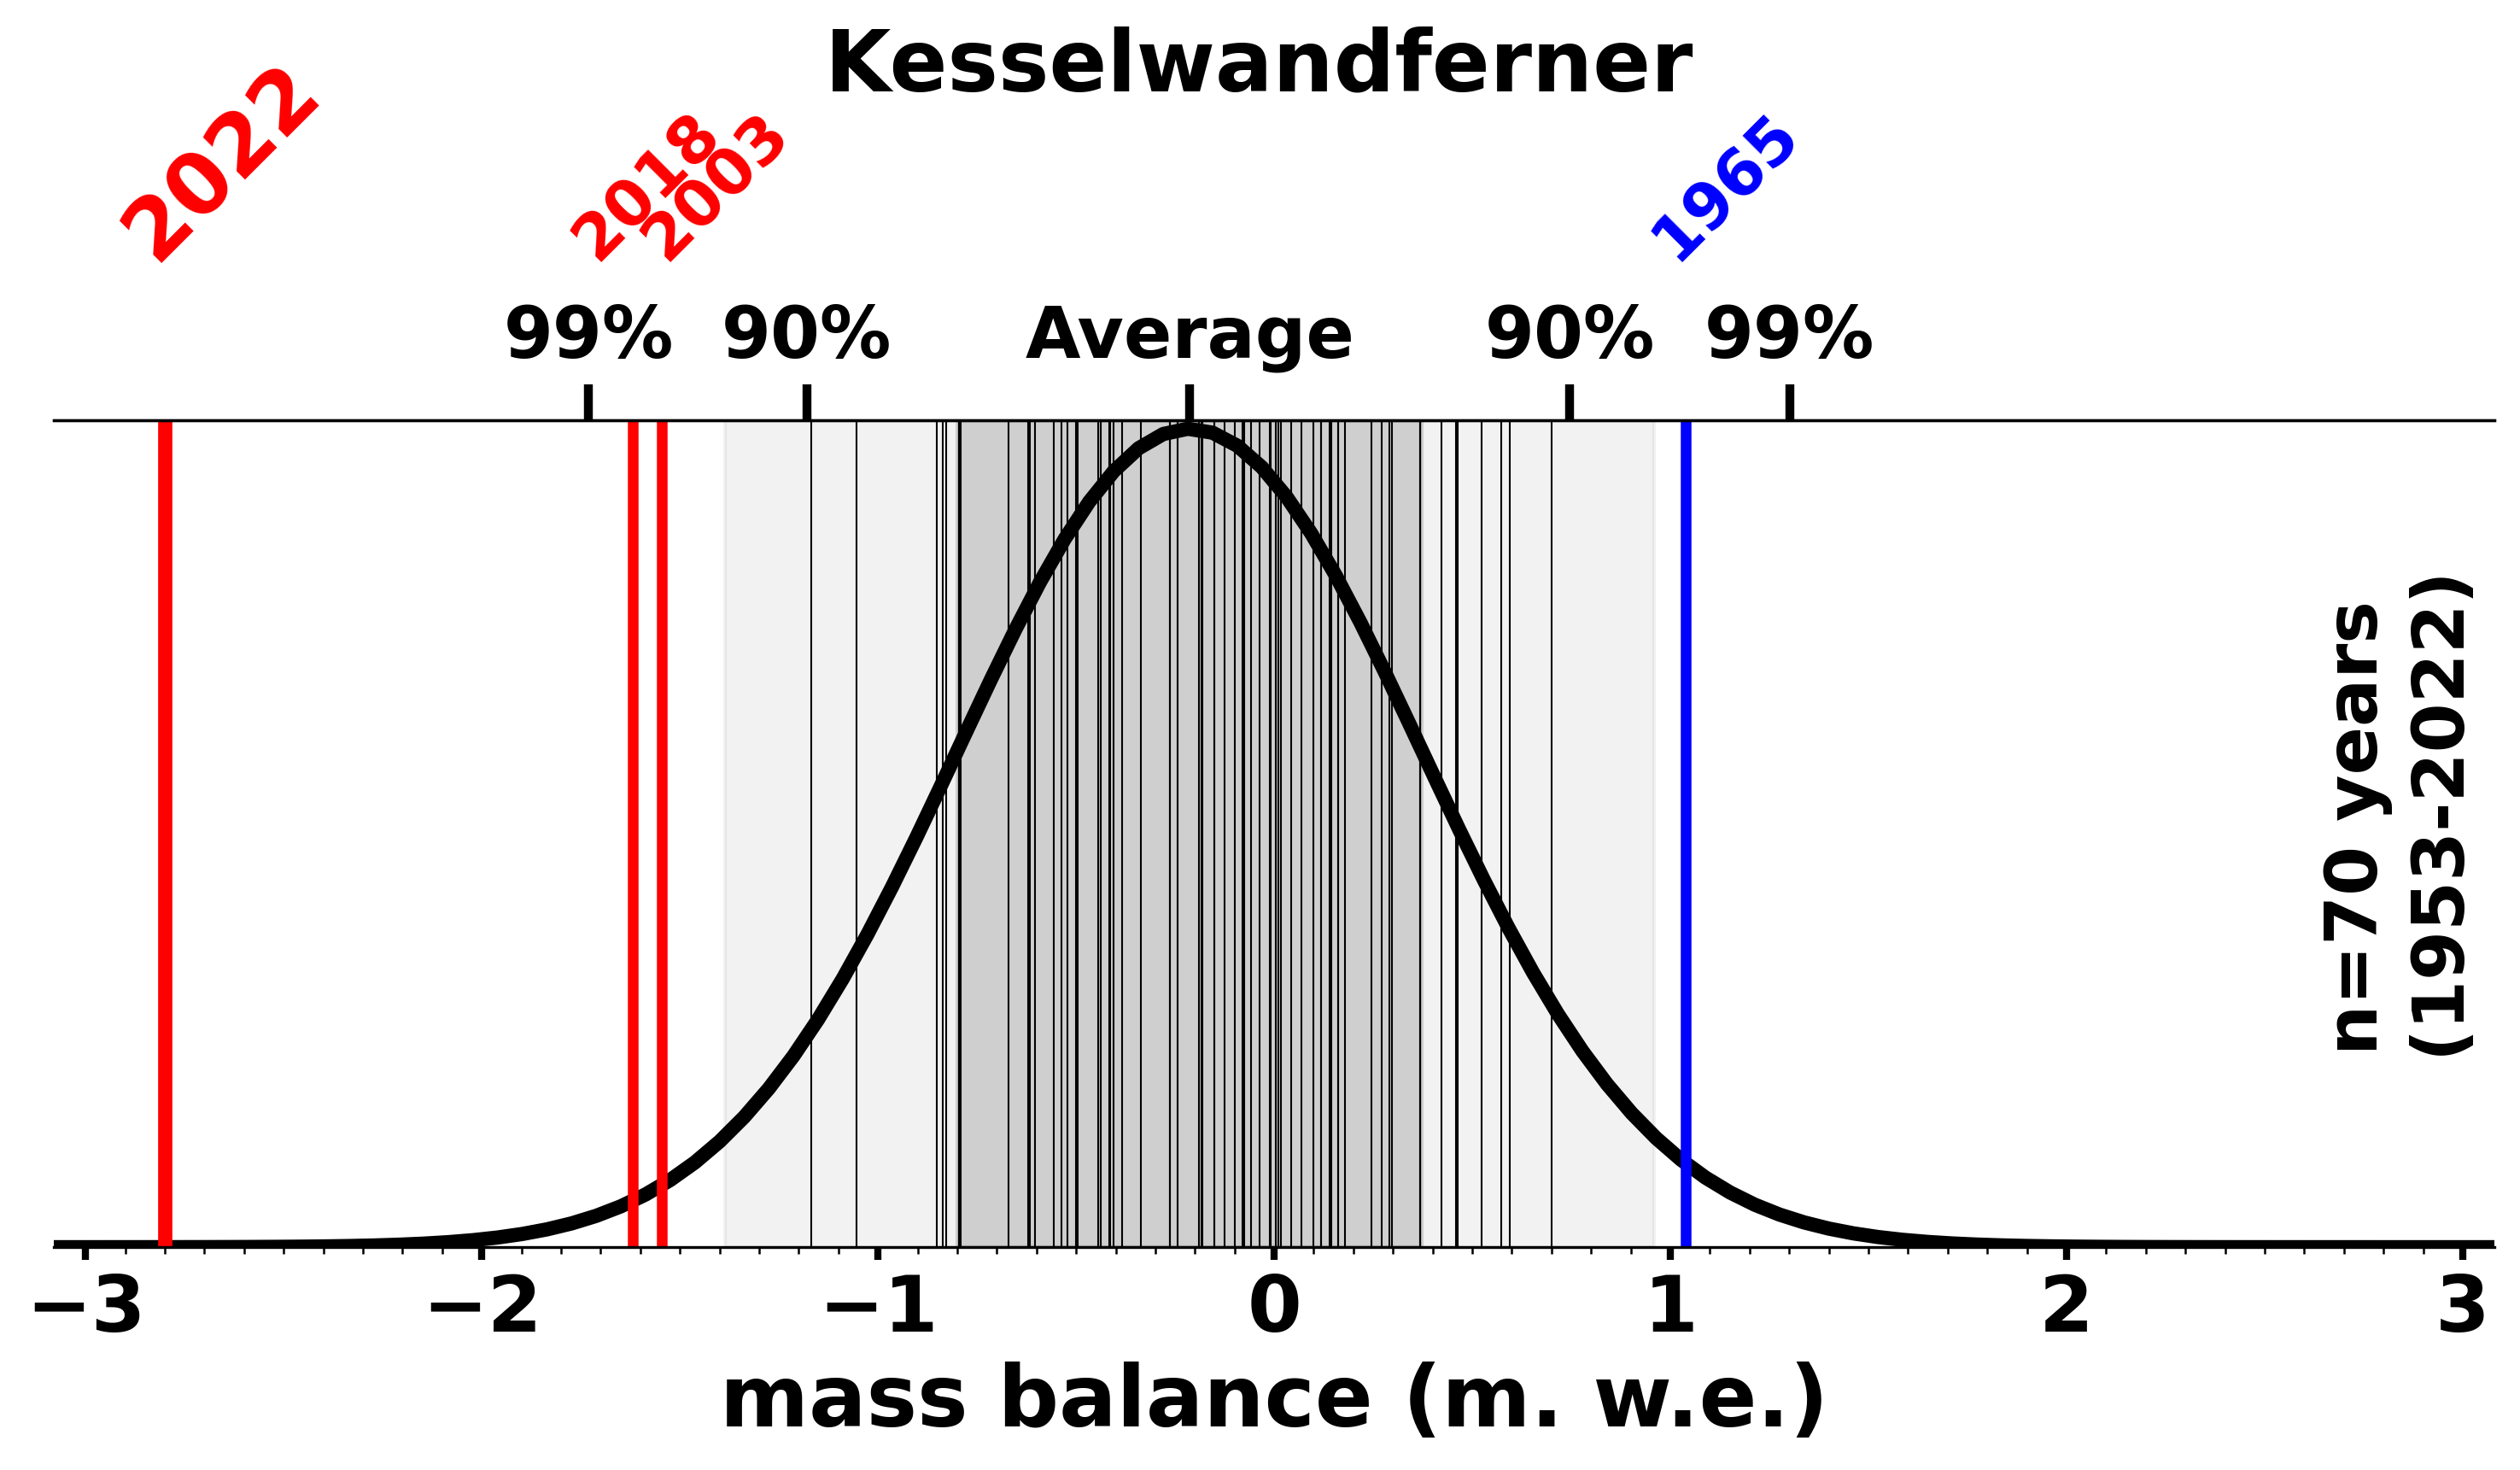

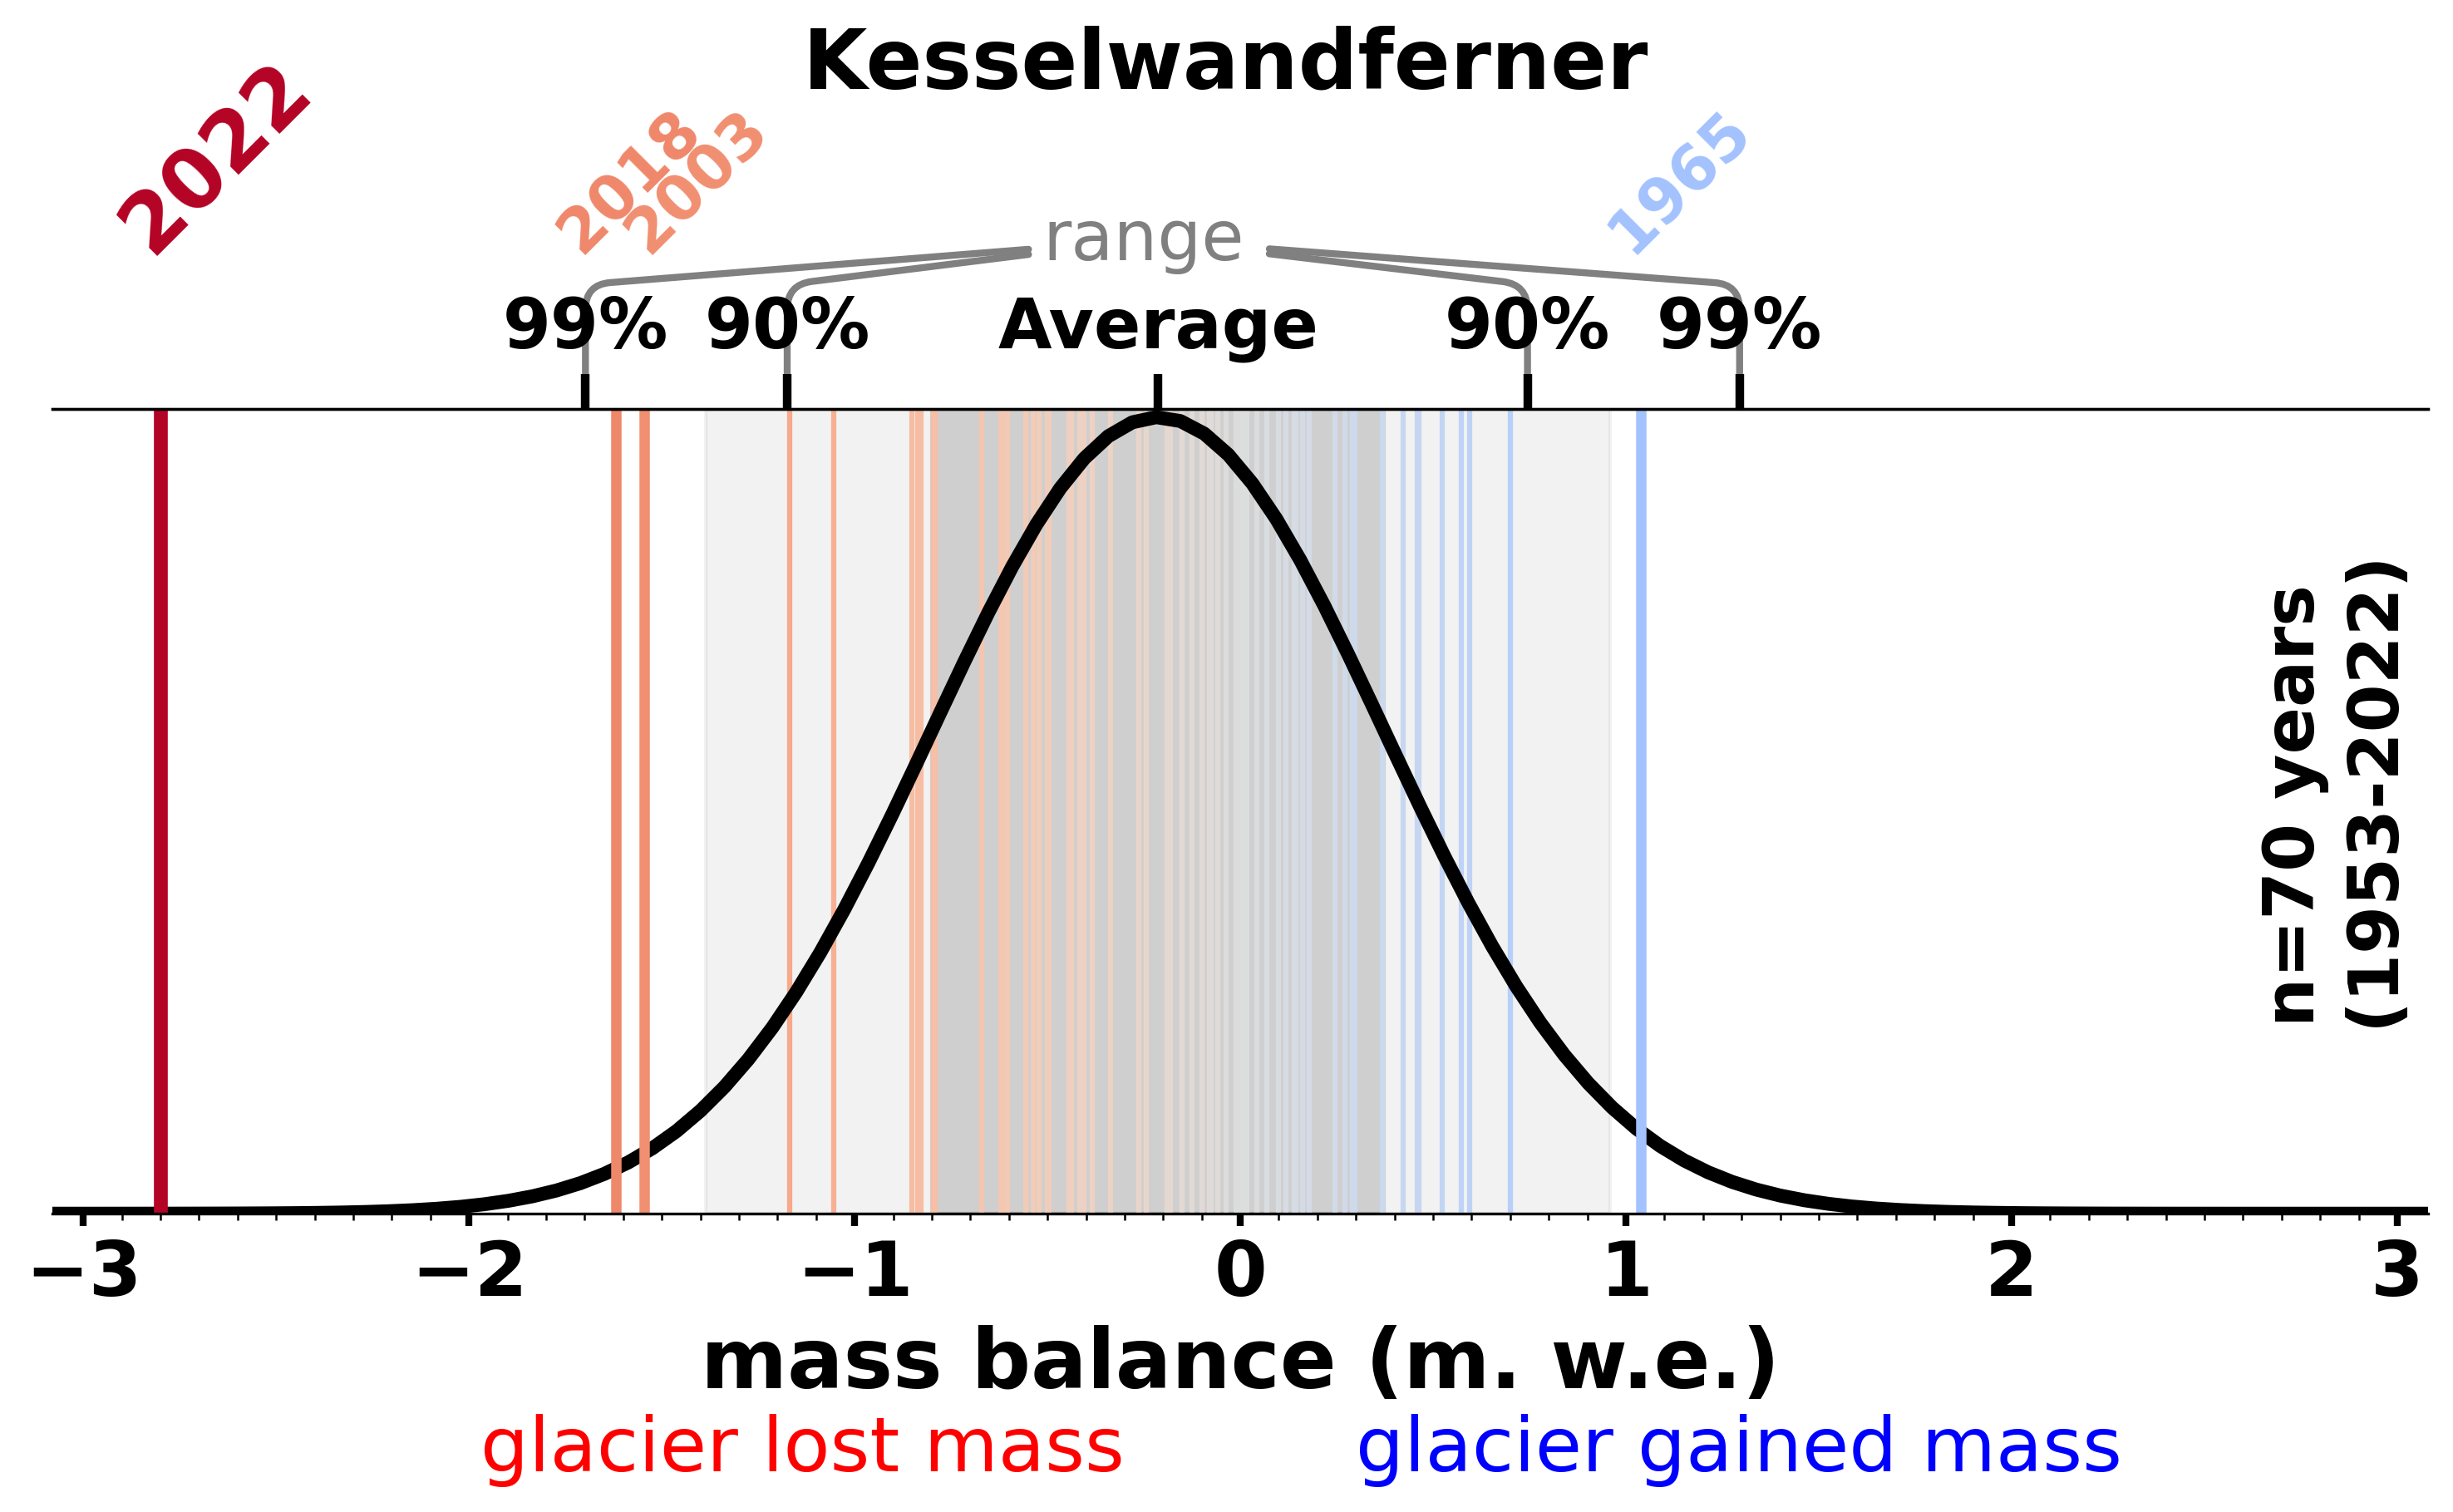

In [6]:
for save in ['save_png', 'save_pdf_svg']:
    # the arrow - line connections to display the ranges somehow work differently if saved as png or as pdf svg, therefore I need different numbers to get "similar" outcomes
    if save == 'save_png':
        armB = 150
    elif save == 'save_pdf_svg':
        armB = 45
    arrowprops = {"arrowstyle":"-", "color":"gray", "connectionstyle":f"arc,angleA=0,angleB=90,armA=0,armB={armB},rad=30", "lw":2}
    for glacier in ['Hintereisferner', 'Kesselwandferner']:
        # the test "glacier lost mass" and "..gained mass", needs different y-location depending on the glacier scale
        # this is adapted here, could be automated if you want to do it on other glaciers ... 
        if glacier == 'Hintereisferner':
            y_span_text_m = 0.18
        elif glacier == 'Kesselwandferner':
            y_span_text_m = 0.22
        for version in ['simple', 'advanced']:
            if glacier == 'Hintereisferner':
                spec_mb_values = spec_mb['HEF mass balance (kg/m�)']/1000  # convert to m w.e.
            elif glacier == 'Kesselwandferner':
                spec_mb_values = spec_mb['KWF mass balance (kg/m�)']/1000  # convert to m w.e.

            # get maximum specific mb and use them as limits for the plots and for the colormap scales 
            # we center the mass balance at 0, hence we just get the maximum absolute value 
            xlims_abs = np.max([np.absolute(spec_mb_values.max()),
                    np.absolute(spec_mb_values.min())])*1.1
            if version == 'advanced':
                # for the blue-red colormap (only necessary for advanced version)
                # that is centered at MB = 0
                # normalize item number values to colormap
                # strongest color for the maximum absolute MB
                norm_col = matplotlib.colors.Normalize(vmin=-np.max([np.absolute(spec_mb_values.max()), 
                                                                     np.absolute(spec_mb_values.min())]),
                                                       vmax=np.max([np.absolute(spec_mb_values.max()), 
                                                                    np.absolute(spec_mb_values.min())]))

            fig,_ = plt.subplots(1,1,figsize=(10,6))
            fig.set_dpi(300)

            # plot each year as vertical line 
            for j, yr in enumerate(spec_mb.index):
                if version == 'advanced':
                    color =  cm.coolwarm_r(norm_col(spec_mb_values))[j]
                    lw = 1.5
                else:
                    color = 'black'
                    lw = 0.5
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw)

            plt.xlim([-xlims_abs, xlims_abs])

            # fit and plot the gaussian distribution (fitted from the observations)
            # get mean and std of the observed specific mb values
            mean, std = norm.fit(spec_mb_values)
            xmin, xmax = -xlims_abs,xlims_abs
            x = np.linspace(xmin, xmax, 100)
            y = norm.pdf(x, mean, std)
            plt.plot(x, y, lw=4, color='black')

            # check if a year is "extreme" (outside the mean +/- 2std or mean +/- 3 std)
            # if this is true, draw the vertical line bigger and in color (depending on if it is a positive or negative extreme)
            # horizontal displacement of year text
            for j,yr in enumerate(spec_mb.index):
                if glacier == 'Kesselwandferner':
                    if yr==2018:
                        x_ch = 1.11
                    else:
                        x_ch = 1.05
                else:
                    x_ch = 1.05
                if spec_mb_values.loc[yr] < mean-3*std:
                    if version == 'advanced':
                        color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                    else:
                        color = 'red'
                    ## very negative MB extremes in red
                    plt.axvline(spec_mb_values.loc[yr], color = color, lw=4)
                    plt.text(spec_mb_values.loc[yr]*x_ch,y.max()+y.max()/4.8 ,f'{yr}', 
                             rotation=45, fontsize=24, fontweight='bold', color = color, zorder=2)
                elif spec_mb_values.loc[yr] < mean-2*std:
                    if version == 'advanced':
                        color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                    else:
                        color = 'red'
                    ## negative MB extremes in red
                    plt.axvline(spec_mb_values.loc[yr], color = color, lw=3)

                    plt.text(spec_mb_values.loc[yr]*x_ch,y.max()+y.max()/4.8 ,f'{yr}', #%': year {spec_mb_values.index[0]}-{spec_mb_values.index[-1]}',
                             rotation=45, 
                             fontsize=18, fontweight='bold', color = color, zorder=2)
                elif spec_mb_values.loc[yr] > mean+2*std:
                    if version == 'advanced':
                        color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                    else:
                        color = 'blue'
                    ## positive MB extremes 
                    plt.axvline(spec_mb_values.loc[yr], color = color, lw=3)
                    plt.text(spec_mb_values.loc[yr]*0.89,
                             y.max()+y.max()/4.8 ,f'{yr}', 
                             rotation=45, 
                             fontsize=18, fontweight='bold', color = color, zorder=2)
                elif spec_mb_values.loc[yr] > mean+3*std:
                    # does not occur for HEF and KWF, but maybe for other glaciers
                    if version == 'advanced':
                        color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                    else:
                        color = 'blue'
                    ## positive MB extremes 
                    plt.axvline(spec_mb_values.loc[yr], color = color, lw=4)
                    plt.text(spec_mb_values.loc[yr]*0.89,
                             y.max()+y.max()/4.8 ,f'{yr}', 
                             rotation=45, 
                             fontsize=24, fontweight='bold', color = color, zorder=2)

            plt.xlabel('mass balance (m. w.e.)', fontsize=24, fontweight='bold')
            plt.title(f'{glacier} \n \n', fontsize=24, fontweight='bold')
            ax = plt.gca()
            ax.set_xticks(np.arange(-int(xlims_abs)-1, int(xlims_abs)+1.01,0.1), minor=True)
            plt.xticks(ticks=np.arange(-int(xlims_abs), int(xlims_abs)+0.01,1), fontsize=22, fontweight='bold')#, width=2)
            ax.tick_params(axis='x', which='major', labelsize=22, width=2) #,fontweight='bold') #, width=2.5, length=10)

            plt.xlim([-xlims_abs, xlims_abs])

            plt.text(0.93, 0.25,f'n={len(spec_mb_values)} years\n({spec_mb.index[0]}-{spec_mb.index[-1]})', 
                     rotation=90, transform=plt.gca().transAxes, fontsize=20, fontweight='bold')

            # create secondary axis and plot the quantiles 
            ax2 = ax.secondary_xaxis(location='top')
            # create random values and then compute the quantiles to get the 90% and 99%-range
            gauss_dis_random_vals=np.random.normal(loc=mean, scale=std, size=100000)
            q005,q05,q95,q995 = np.quantile(gauss_dis_random_vals, q=[0.005, 0.05,0.95,0.995])
            ax2.set_xticks([q005,q05,mean,q95,q995])
            ax2.set_xticklabels(labels= ['99%','90%',r'Average','90%','99%'] , fontweight='bold', fontsize=18)
            ax2.set_zorder(2)
            if version=='advanced':
                # draw the range line to make clearer that this represents the 99%-range & 90% range ...
                plt.annotate('range', xy=(q05, y.max()*1.01),
                            xytext=(mean-0.3, y.max()*1.18), fontsize=20,color='grey',
                            xycoords='data',
                              verticalalignment='bottom',
                             arrowprops=arrowprops,
                            zorder=1) 
                plt.annotate('range', xy=(q95, y.max()*1.01), alpha=0,
                            xytext=(mean-0.27, y.max()*1.18), fontsize=20, 
                            xycoords='data',
                                                       verticalalignment='bottom',
                             arrowprops=arrowprops,
                            zorder=1) 

                plt.annotate('range', xy=(q005, y.max()*1.01), alpha=0,
                            xytext=(mean-0.3, y.max()*1.18), fontsize=20,color='grey',
                            xycoords='data',
                             verticalalignment='bottom',
                             arrowprops=arrowprops,
                            zorder=1) 
                plt.annotate('range', xy=(q995, y.max()*1.01), alpha=0,
                            xytext=(mean-0.27, y.max()*1.18), fontsize=20, 
                                                       verticalalignment='bottom',
                            xycoords='data',
                             arrowprops= arrowprops,
                            zorder=1) 

            # remove yticks
            plt.yticks(ticks=[])
            #remove yline axis
            ax.spines['left'].set_linewidth(0)
            ax.spines['right'].set_linewidth(0)
            # make sure that 0 "probability" is directly on the x-axis
            plt.ylim([0,y.max()*1.01])

            # make spans over mean +/-1std and mean +/-2std
            plt.axvspan(mean-std, mean+std, color='grey', alpha = 0.3)
            plt.axvspan(mean-2*std, mean+2*std, color='grey', alpha = 0.1)

            #if save=='save_png':
            plt.tight_layout()
            # set the parameters for both axis: label size in font points, the line tick line width and length in pixels
            ax2.tick_params(axis='x', which='major', labelsize=20, width=2.5, length=10)

            if version == 'advanced':
                plt.text(0.3, y.min()-y_span_text_m,'glacier gained mass', color='blue', rotation=0, fontsize=22)
                plt.text(-0.3, y.min()-y_span_text_m,'glacier lost mass', color='red', rotation=0, fontsize=22, 
                         horizontalalignment='right')
            #if save == 'save_pdf_svg':
            #    plt.tight_layout()

            if glacier == 'Hintereisferner':
                if save=='save_png':
                    plt.savefig(f'hef_mb_distributions_{version}.png', bbox_inches='tight')
                else:
                    plt.savefig(f'hef_mb_distributions_{version}.svg', bbox_inches='tight')
                    plt.savefig(f'hef_mb_distributions_{version}.pdf', bbox_inches='tight')

            elif glacier == 'Kesselwandferner':
                if save=='save_png':
                    plt.savefig(f'kwf_mb_distributions_{version}.png', bbox_inches='tight') 
                else:
                    plt.savefig(f'kwf_mb_distributions_{version}.svg', bbox_inches='tight') 
                    plt.savefig(f'kwf_mb_distributions_{version}.pdf', bbox_inches='tight')
            if save == 'save_pdf_svg':
                plt.close()

- in advanced version, the colors go from red (most negative) to blue (most positive), and have a neutral color in mb=0 


### plot variant for Cryosphere Short Communication paper (Voordendag et al., in discussion)

In [6]:
import seaborn as sns
base_col = sns.color_palette([sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[2], sns.color_palette('colorblind')[3]])

col_sp_yr = {2020: base_col[0],
            2021: base_col[1],
            2022: base_col[2]}

In [9]:
scipy.stats.norm?

Signature:       scipy.stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7fa760fa8640>
File:            ~/micromamba/envs/oggm_pymc/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.


In [15]:
scipy.stats.genextreme?

Signature:       scipy.stats.genextreme(*args, **kwds)
Type:            genextreme_gen
String form:     <scipy.stats._continuous_distns.genextreme_gen object at 0x7fa760fb6580>
File:            ~/micromamba/envs/oggm_pymc/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A generalized extreme value continuous random variable.

As an instance of the `rv_continuous` class, `genextreme` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(c, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, c, loc=0, scale=1)
    Probability density function.
logpdf(x, c, loc=0, scale=1)
    Log of the probability density function.
cdf(x, c, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, c, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, c, loc=0, scale=1)
    Survival function  (also defi

ValueError: operands could not be broadcast together with shapes (3,) (100,) 

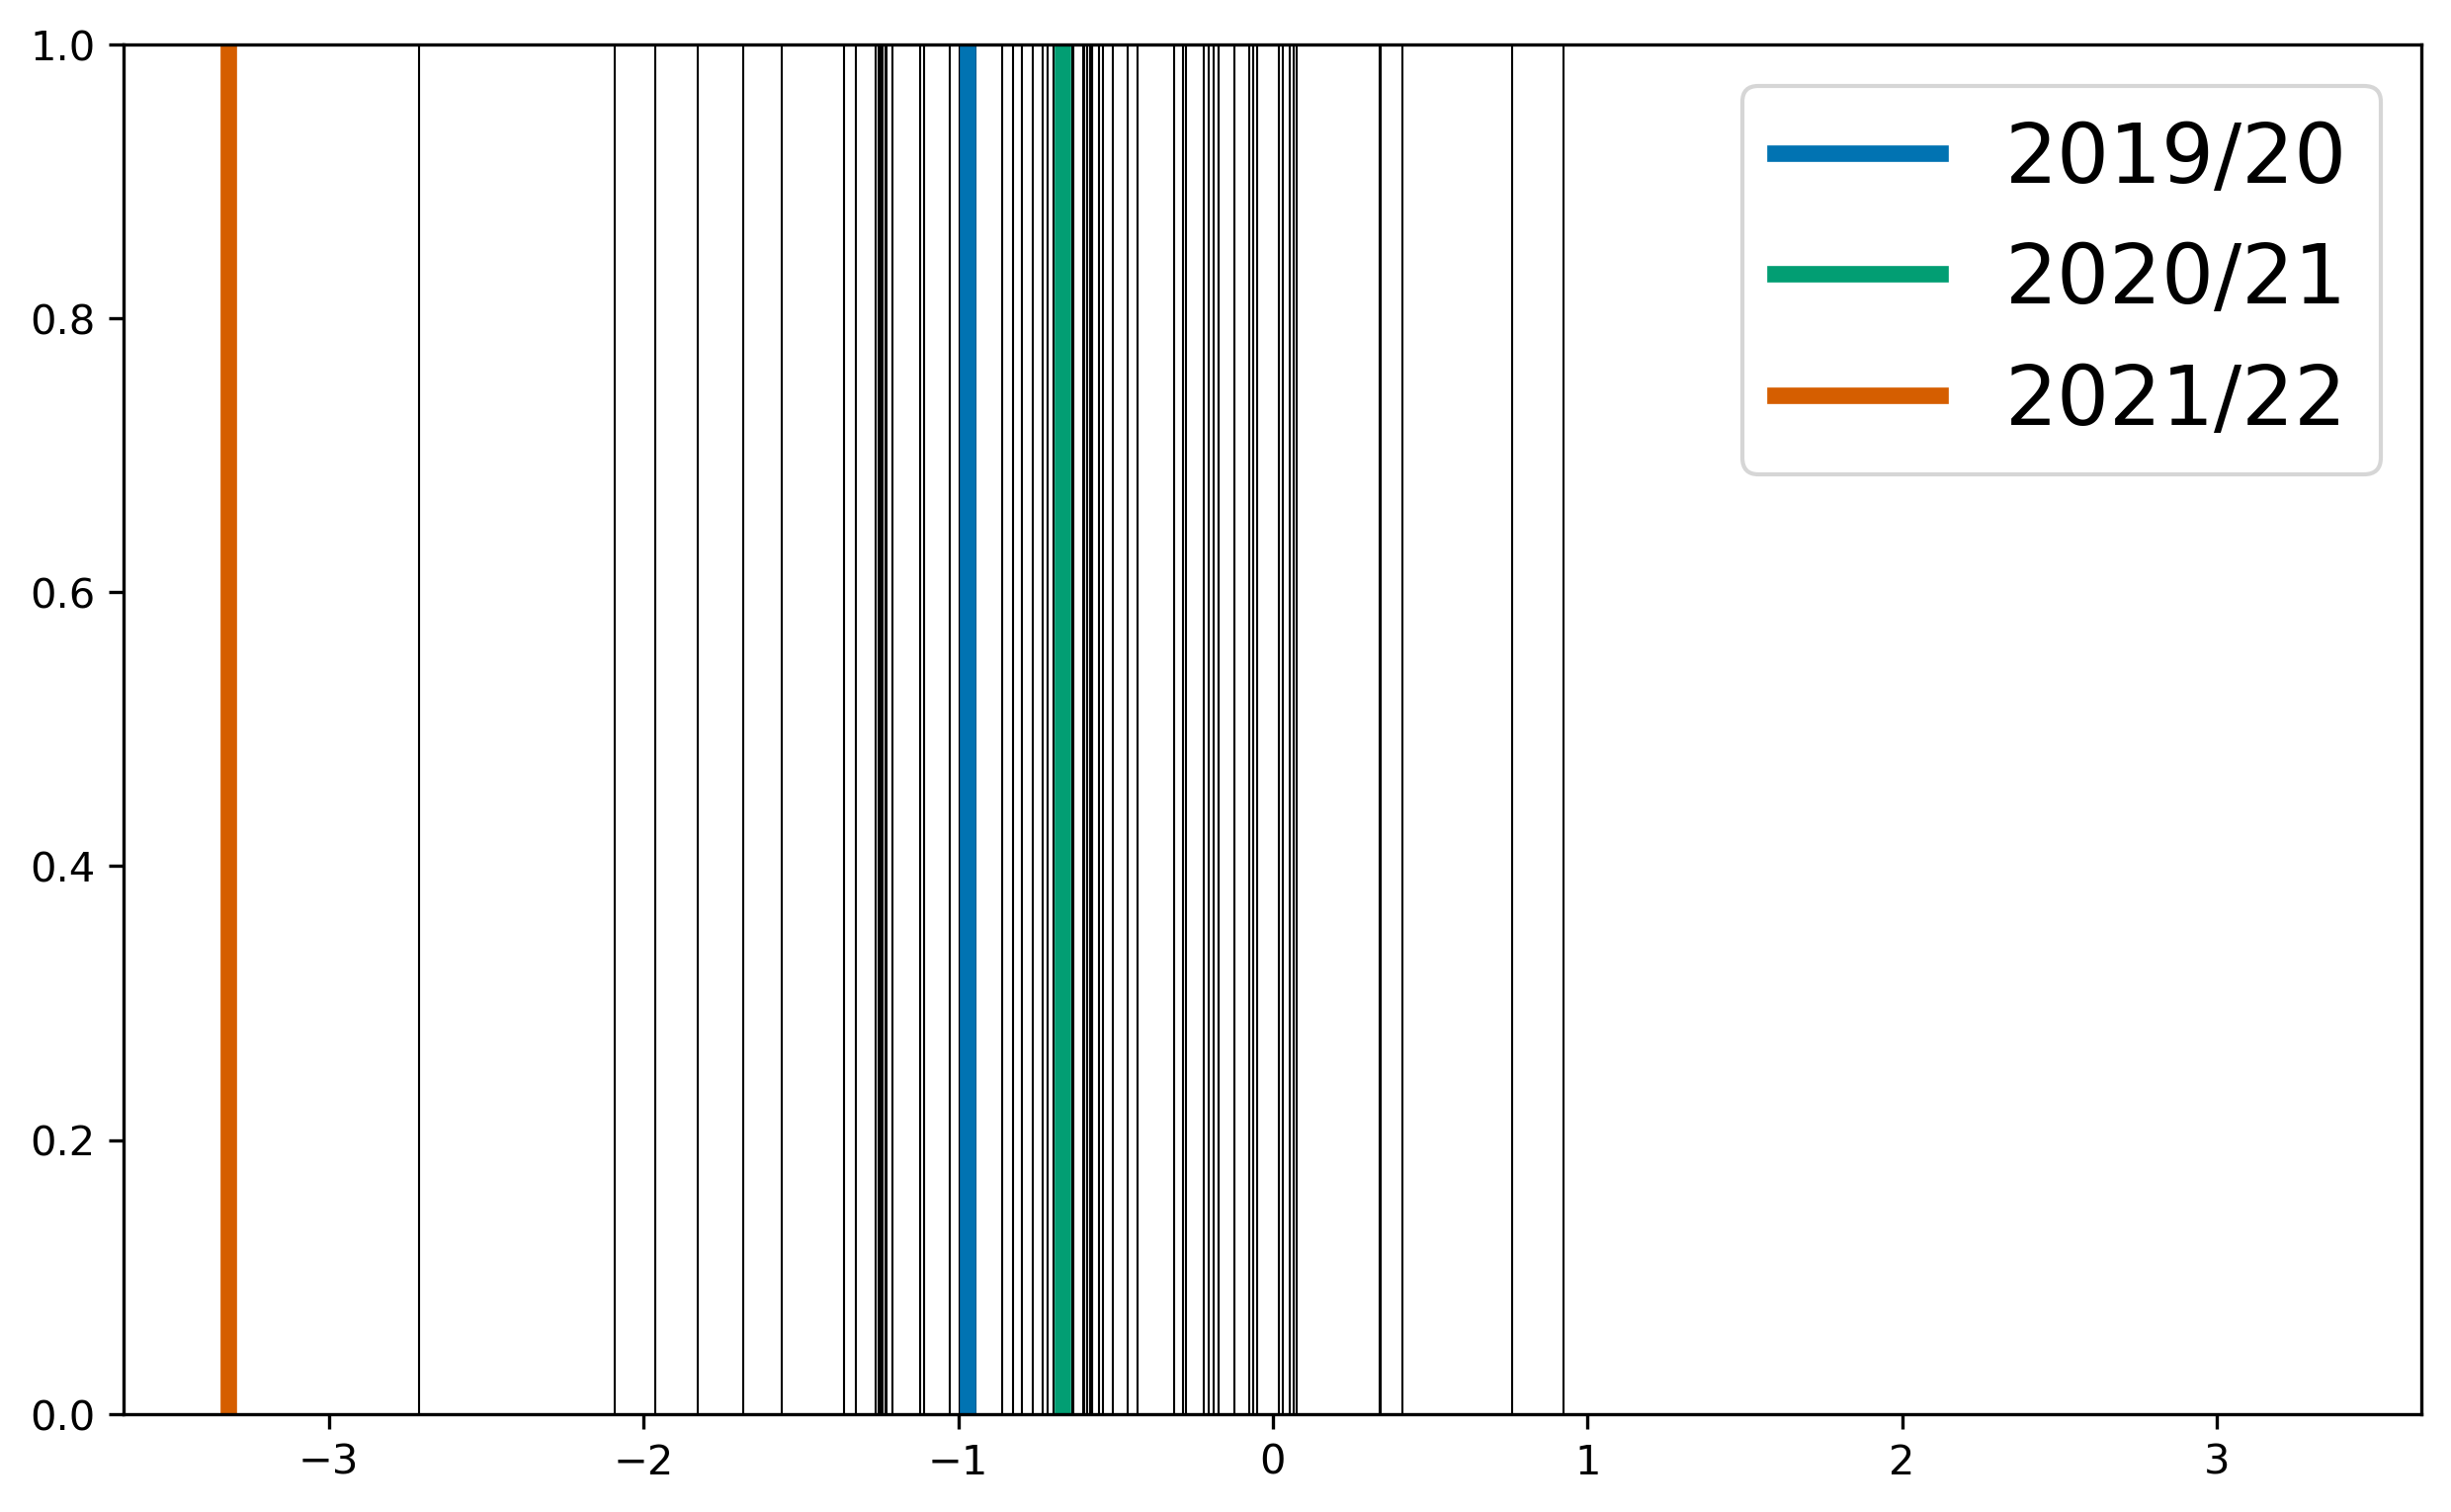

In [18]:
version = 'tc'
for save in ['save_png', 'save_pdf_svg']:
    # the arrow - line connections to display the ranges somehow work differently if saved as png or as pdf svg, therefore I need different numbers to get "similar" outcomes
    if save == 'save_png':
        armB = 150
    elif save == 'save_pdf_svg':
        armB = 45
    arrowprops = {"arrowstyle":"-", "color":"gray", "connectionstyle":f"arc,angleA=0,angleB=90,armA=0,armB={armB},rad=30", "lw":2}
    for glacier in ['Hintereisferner']: 
        # the test "glacier lost mass" and "..gained mass", needs different y-location depending on the glacier scale
        # this is adapted here, could be automated if you want to do it on other glaciers ... 
        if glacier == 'Hintereisferner':
            y_span_text_m = 0.18
        else:
            y_span_text_m = 0.22
        if glacier == 'Hintereisferner':
            spec_mb_values = spec_mb['HEF mass balance (kg/m�)']/1000 # use 10**3 kg m-2 
        elif glacier == 'Kesselwandferner':
            spec_mb_values = spec_mb['KWF mass balance (kg/m�)']/1000 # use 10**3 kg m-2 

        # get maximum specific mb and use them as limits for the plots and for the colormap scales 
        # we center the mass balance at 0, hence we just get the maximum absolute value 
        xlims_abs = np.max([np.absolute(spec_mb_values.max()),
                np.absolute(spec_mb_values.min())])*1.1
        if version == 'advanced':
            # for the blue-red colormap (only necessary for advanced version)
            # that is centered at MB = 0
            # normalize item number values to colormap
            # strongest color for the maximum absolute MB
            norm_col = matplotlib.colors.Normalize(vmin=-np.max([np.absolute(spec_mb_values.max()), 
                                                                 np.absolute(spec_mb_values.min())]),
                                                   vmax=np.max([np.absolute(spec_mb_values.max()), 
                                                                np.absolute(spec_mb_values.min())]))

        fig,_ = plt.subplots(1,1,figsize=(10,6))
        fig.set_dpi(300)

        # plot each year as vertical line 
        for j, yr in enumerate(spec_mb.index):
            if yr in [2020,2021,2022]:
                color = col_sp_yr[yr]
                lw=4
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw, label =f'{yr-1}/{str(yr)[2:]}')

            else:
                color = 'black'
                lw = 0.5
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw)
        plt.legend(fontsize=20)

        plt.xlim([-xlims_abs, xlims_abs])

        # fit and plot the generalized extreme value distribution (fitted from the observations)
        # get mean and std of the observed specific mb values
        params = scipy.stats.genextreme.fit(spec_mb_values)
        xmin, xmax = -xlims_abs,xlims_abs
        x = np.linspace(xmin, xmax, 100)
        y = scipy.stats.genextreme.pdf(x, params)
        plt.plot(x, y, lw=4, color='black')

        # check if a year is "extreme" (outside the mean +/- 2std or mean +/- 3 std)
        # if this is true, draw the vertical line bigger and in color (depending on if it is a positive or negative extreme)
        # horizontal displacement of year text                

        plt.xlabel(r'mass balance (10$^{3}$ kg m$^{-2}$)', fontsize=24) #, fontweight='bold')
        #plt.title(f'{glacier} \n \n', fontsize=24, fontweight='bold')
        ax = plt.gca()
        ax.set_xticks(np.arange(-int(xlims_abs)-1, int(xlims_abs)+1.01,0.1), minor=True)
        plt.xticks(ticks=np.arange(-int(xlims_abs), int(xlims_abs)+0.01,1), fontsize=22) #, fontweight='bold')#, width=2)
        ax.tick_params(axis='x', which='major', labelsize=22, width=2) #,fontweight='bold') #, width=2.5, length=10)

        plt.xlim([-xlims_abs, xlims_abs])

        plt.text(0.77, 0.5,
                 f'n={len(spec_mb_values)} years:\n1952-2022', 
                 #rotation=90,
                 transform=plt.gca().transAxes, fontsize=20) #, fontweight='bold')

        # create secondary axis and plot the quantiles 
        ax2 = ax.secondary_xaxis(location='top')
        # create random values and then compute the quantiles to get the 90% and 99%-range
        #gauss_dis_random_vals=np.random.normal(loc=mean, scale=std, size=100000)
        #q005,q05,q95,q995 = np.quantile(gauss_dis_random_vals, q=[0.005, 0.05,0.95,0.995])
        # annotate the -3 to 3 sigma:

        ax2.set_xticks([mean-3*std,mean-2*std,mean-1*std,mean,mean+1*std,mean+2*std,mean+3*std])
        ax2.set_xticklabels(labels= [r'-3$\sigma$',r'-2$\sigma$',r'-1$\sigma$',
                                     r'mean',r'+1$\sigma$', r'+2$\sigma$', r'+3$\sigma$']) # , fontweight='bold', fontsize=16)
        ax2.set_zorder(2)
        #if version=='advanced':
        # draw the range line to make clearer that this represents the 99%-range & 90% range ...

        # remove yticks
        plt.yticks(ticks=[])
        #remove yline axis
        ax.spines['left'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        # make sure that 0 "probability" is directly on the x-axis
        plt.ylim([0,y.max()*1.01])

        # make spans over mean +/-1std and mean +/-2std
        #plt.axvspan(mean-std, mean+std, color='grey', alpha = 0.3)
        #plt.axvspan(mean-2*std, mean+2*std, color='grey', alpha = 0.1)

        #if save=='save_png':
        plt.tight_layout()
        # set the parameters for both axis: label size in font points, the line tick line width and length in pixels
        ax2.tick_params(axis='x', which='major', labelsize=20, width=2.5, length=10)


        if glacier == 'Hintereisferner':
            if save=='save_png':
                plt.savefig(f'hef_mb_distributions_{version}_gev.png', bbox_inches='tight')
            else:
                plt.savefig(f'hef_mb_distributions_{version}_gev.svg', bbox_inches='tight')
                plt.savefig(f'hef_mb_distributions_{version}_gev.pdf', bbox_inches='tight')

        if save == 'save_pdf_svg':
            plt.close()

In [22]:
scipy.stats.genextreme.pdf?

Signature: scipy.stats.genextreme.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      ~/micromamba/envs/oggm_pymc/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


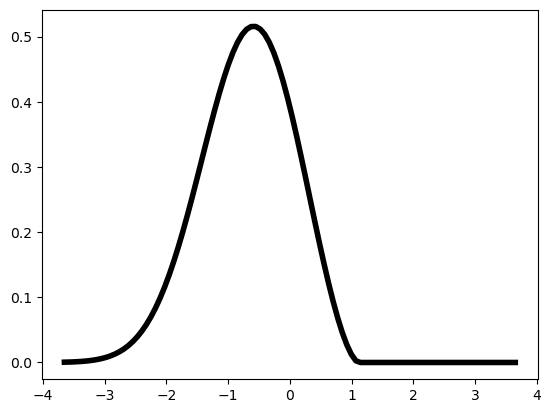

In [24]:
params = scipy.stats.genextreme.fit(spec_mb_values)
xmin, xmax = -xlims_abs,xlims_abs
x = np.linspace(xmin, xmax, 100)
y = scipy.stats.genextreme.pdf(x, *params)
plt.plot(x, y, lw=4, color='black')